# **Dataset 1**

### **Import Packages**

In [13]:
import multiprocessing
import subprocess
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

from Data_Generation.data_synthesizer import ds_generate_data
from Data_Generation.synthetic_data_vault import sdv_generate_data
from Data_Evaluation.utility import run_utility_eval
from Data_Evaluation.resemblance import pairwise_correlation_diff, jsd, wd
from Data_Evaluation.privacy import dcr, nndr, mia
from sklearn.preprocessing import LabelEncoder

### **Exploratory Data Analysis**

In [14]:

data_path = "Original_Data/Dataset_1.csv"
original_data = pd.read_csv(data_path)
original_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [15]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [16]:
original_data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [17]:
original_data.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [18]:
# Check categorical columns
categorical_cols = original_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col, original_data[col].unique())

gender ['M' 'F']
NationalITy ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceofBirth ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID ['A' 'B' 'C']
Topic ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester ['F' 'S']
Relation ['Father' 'Mum']
ParentAnsweringSurvey ['Yes' 'No']
ParentschoolSatisfaction ['Good' 'Bad']
StudentAbsenceDays ['Under-7' 'Above-7']
Class ['M' 'L' 'H']


<Axes: xlabel='Class', ylabel='Count'>

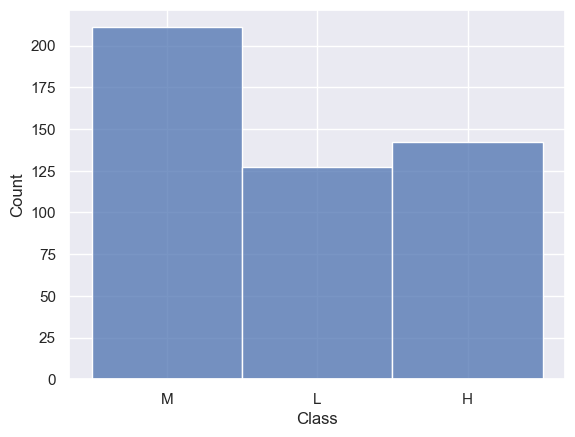

In [19]:
# Check class distribution
sns.histplot(original_data['Class'])

### **Synthetic Data Generation**

In [20]:
# Set the start method of the multiprocessing module to 'fork' to avoid an error
multiprocessing.set_start_method('fork', force=True)

# Number of samples to generate
n = 5000

# Split the data into train and test sets (70% train, 30% test) according to evaluation paper
train_data, test_data = train_test_split(original_data, test_size=0.3, random_state=42)
train_data.to_csv("Original_Data/train_data.csv", index=False)
test_data.to_csv("Original_Data/test_data.csv", index=False)

In [21]:
# !! Only use if synthetic data is not already generated !!

# Use train_data.csv to fit SDG models and generate synthetic data
# data_path = "Original_Data/train_data.csv"
# arguments = [data_path, str(n), "1"]

# print("Sampling synthpop...")
# result = subprocess.run(['Rscript', 'Data_Generation/synthpop.R',   *arguments], capture_output=True, text=True)

# print("Sampling DataSynthesizer...")
# ds_generate_data(data_path=data_path, num_samples=n, dataset_nr="1")

# sdv_generate_data(data_path=data_path, num_samples=n, dataset_nr="1")

Encode all categorical columns of both original (train+test) data and synthetic data using label encoding

In [22]:
synthpop = pd.read_csv("Synthetic_Data/Dataset_1/synthpop_samples.csv")
ds = pd.read_csv("Synthetic_Data/Dataset_1/ds_samples.csv")
tvae = pd.read_csv("Synthetic_Data/Dataset_1/tvae_samples.csv")
gaussian_copula = pd.read_csv("Synthetic_Data/Dataset_1/gaussian_samples.csv")
copula_gan = pd.read_csv("Synthetic_Data/Dataset_1/copula_gan_samples.csv")
ctgan = pd.read_csv("Synthetic_Data/Dataset_1/ctgan_samples.csv")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

    synthpop[col] = le.fit_transform(synthpop[col])
    ds[col] = le.fit_transform(ds[col])
    tvae[col] = le.fit_transform(tvae[col])
    gaussian_copula[col] = le.fit_transform(gaussian_copula[col])
    copula_gan[col] = le.fit_transform(copula_gan[col])
    ctgan[col] = le.fit_transform(ctgan[col])

    label_encoders[col] = le


### **Utility Evaluation**

Run random forest classifier for utility evaluation

In [23]:
target_col = 'Class'
models = [synthpop, ds, tvae, gaussian_copula, copula_gan, ctgan]
model_names = ["synthpop", "ds", "tvae", "gaussian_copula", "copula_gan", "ctgan"]

In [24]:
rf_results = {}
rows = []

for i, model in enumerate(models):
    rf_results[model_names[i]] = run_utility_eval(train_data, test_data, model, target_col, "random_forest")
    
    acc_diff = rf_results[model_names[i]]["acc_diff"]
    f1_diff = rf_results[model_names[i]]["f1_diff"]
    roc_auc_diff = rf_results[model_names[i]]["roc_auc_diff"]

    rows.append([1,model_names[i], acc_diff, f1_diff, roc_auc_diff])

rf_df = pd.DataFrame(rows, columns=["Dataset", "Model", "Accuracy Difference", "F1 Score Difference", "ROC AUC Difference"])
rf_df.to_csv("Evaluation_Results/RF_Results.csv", index=False)
rf_df.head()


,Dataset,Model,Accuracy Difference,F1 Score Difference,ROC AUC Difference
0,1,synthpop,0.07,0.07,0.05
1,1,ds,0.46,0.47,0.49
2,1,tvae,0.19,0.24,0.10
3,1,gaussian_copula,0.37,0.42,0.40
4,1,copula_gan,0.42,0.44,0.40


Run logistic regression for utility evaluation

In [25]:
lr_results = {}
rows = []

for i, model in enumerate(models):
    lr_results[model_names[i]] = run_utility_eval(train_data, test_data, model, target_col, "logistic_regression")

    acc_diff = lr_results[model_names[i]]["acc_diff"]
    f1_diff = lr_results[model_names[i]]["f1_diff"]
    roc_auc_diff = lr_results[model_names[i]]["roc_auc_diff"]

    rows.append([1,model_names[i], acc_diff, f1_diff, roc_auc_diff])

lr_df = pd.DataFrame(rows, columns=["Dataset", "Model", "Accuracy Difference", "F1 Score Difference", "ROC AUC Difference"])
lr_df.to_csv("Evaluation_Results/LR_Results.csv", index=False)
lr_df.head()


/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

,Dataset,Model,Accuracy Difference,F1 Score Difference,ROC AUC Difference
0,1,synthpop,0.04,0.05,0.00
1,1,ds,0.36,0.41,0.35
2,1,tvae,0.20,0.23,0.17
3,1,gaussian_copula,0.36,0.44,0.35
4,1,copula_gan,0.30,0.46,0.38


Run multilayer perceptron (MLP)

In [26]:
mlp_results = {}
rows = []

for i, model in enumerate(models):
    mlp_results[model_names[i]] = run_utility_eval(train_data, test_data, model, target_col, "multilayer_perceptron")

    acc_diff = mlp_results[model_names[i]]["acc_diff"]
    f1_diff = mlp_results[model_names[i]]["f1_diff"]
    roc_auc_diff = mlp_results[model_names[i]]["roc_auc_diff"]

    rows.append([1,model_names[i], acc_diff, f1_diff, roc_auc_diff])

mlp_df = pd.DataFrame(rows, columns=["Dataset", "Model", "Accuracy Difference", "F1 Score Difference", "ROC AUC Difference"])
mlp_df.to_csv("Evaluation_Results/MLP_Results.csv", index=False)
mlp_df.head()

/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

,Dataset,Model,Accuracy Difference,F1 Score Difference,ROC AUC Difference
0,1,synthpop,-0.03,-0.01,0.00
1,1,ds,0.33,0.37,0.28
2,1,tvae,0.05,0.11,0.12
3,1,gaussian_copula,0.31,0.39,0.46
4,1,copula_gan,0.28,0.34,0.39


### **Resemblance**

Run multiple resemblance metrics: Difference in pairwise correlation, Jensen-Shannon divergence, Wasserstein distance

- Correlation distance diff : lower values are better
- JSD in [0,1] range: lower values are better
- WD: lower values are better


**Difference in pairwise correlation:**

In [27]:
corr_diff_results = {}
rows = []

for i, model in enumerate(models):
    corr_diff_results[model_names[i]] = pairwise_correlation_diff(train_data, model)
    rows.append([1,model_names[i], corr_diff_results[model_names[i]]])

corr_diff_df = pd.DataFrame(rows, columns=["Dataset", "Model", "Pairwise Corr Diff"])
corr_diff_df.to_csv("Evaluation_Results/corr_diff.csv", index=False)
corr_diff_df.head()

,Dataset,Model,Pairwise Corr Diff
0,1,synthpop,0.031036
1,1,ds,0.154832
2,1,tvae,0.129155
3,1,gaussian_copula,0.098974
4,1,copula_gan,0.149044


**Jensen-Shannon Divergence**

In [28]:
jsd_results = {}
rows = []

for i, model in enumerate(models):
    jsd_results[model_names[i]] = jsd(train_data, model)
    rows.append([1,model_names[i], jsd_results[model_names[i]]])

jsd_df = pd.DataFrame(rows, columns=["Dataset", "Model", "JSD Diff"])
jsd_df.to_csv("Evaluation_Results/jsd.csv", index=False)
jsd_df.head()

,Dataset,Model,JSD Diff
0,1,synthpop,0.001007
1,1,ds,0.086155
2,1,tvae,0.138397
3,1,gaussian_copula,0.034654
4,1,copula_gan,0.039712


**Wasserstein Distance**

In [29]:
wd_results = {}
rows = []

for i, model in enumerate(models):
    wd_results[model_names[i]] = wd(train_data, model)
    rows.append([1,model_names[i], wd_results[model_names[i]]])

wd_df = pd.DataFrame(rows, columns=["Dataset", "Model", "WD Diff"])
wd_df.to_csv("Evaluation_Results/wd.csv", index=False)
wd_df.head()

,Dataset,Model,WD Diff
0,1,synthpop,0.003638
1,1,ds,0.057474
2,1,tvae,0.110542
3,1,gaussian_copula,0.012057
4,1,copula_gan,0.018956


### **Privacy**

**Distance to closest record (DCR)**

In [30]:
dcr_results = {}
rows = []

for i, model in enumerate(models):
    dcr_results[model_names[i]] = dcr(train_data, model, model_names[i],dataset_nr=1, save_hist=True)
    rows.append([1,model_names[i], dcr_results[model_names[i]]])

dcr_df = pd.DataFrame(rows, columns=["Dataset", "Model", "Avg DCR"])
dcr_df.to_csv("Evaluation_Results/dcr.csv", index=False)
dcr_df.head()   

,Dataset,Model,Avg DCR
0,1,synthpop,0.372141
1,1,ds,0.411768
2,1,tvae,0.364307
3,1,gaussian_copula,0.380956
4,1,copula_gan,0.379466


<Figure size 640x480 with 0 Axes>

**Nearest Neighbor distance ratio (NNDR)**

In [31]:
nndr_results = {}
rows = []

for i, model in enumerate(models):
    nndr_results[model_names[i]] = nndr(train_data, model)
    rows.append([1,model_names[i], nndr_results[model_names[i]]])

nndr_df = pd.DataFrame(rows, columns=["Dataset", "Model", "Avg NNDR"])
nndr_df.to_csv("Evaluation_Results/nndr.csv", index=False)
nndr_df.head()  

,Dataset,Model,Avg NNDR
0,1,synthpop,0.733478
1,1,ds,0.901194
2,1,tvae,0.834353
3,1,gaussian_copula,0.876774
4,1,copula_gan,0.886875


**Membership Inference Attack (MIA)**

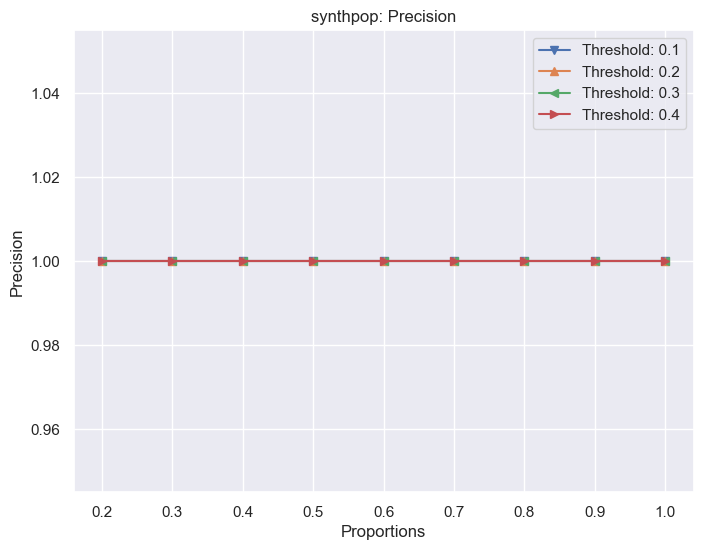

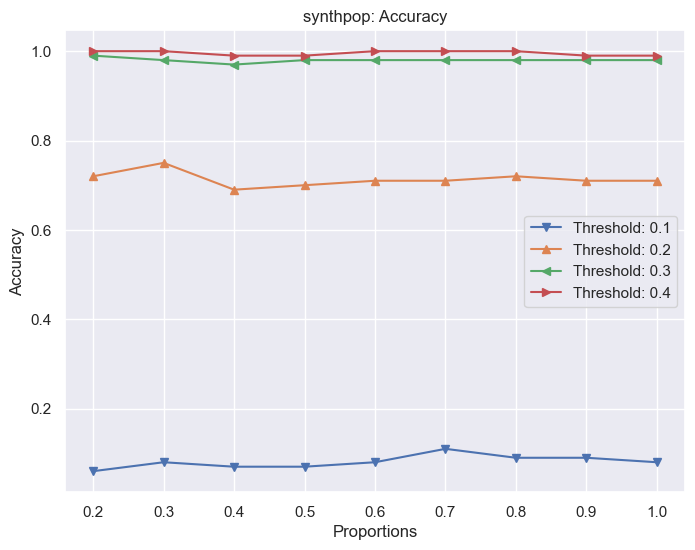

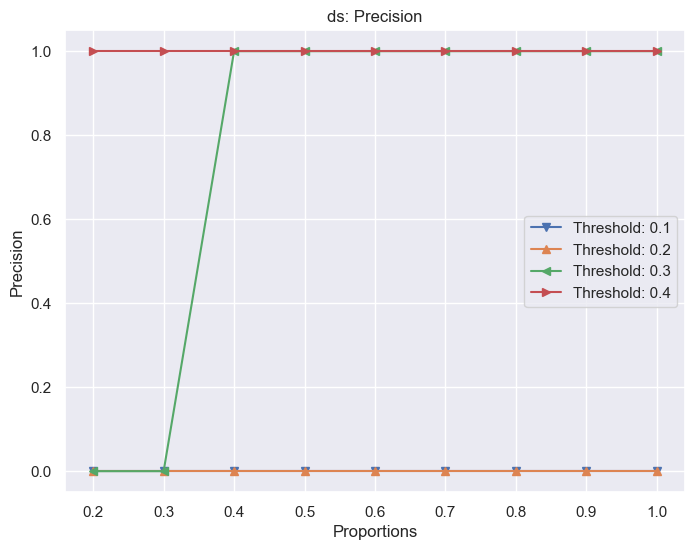

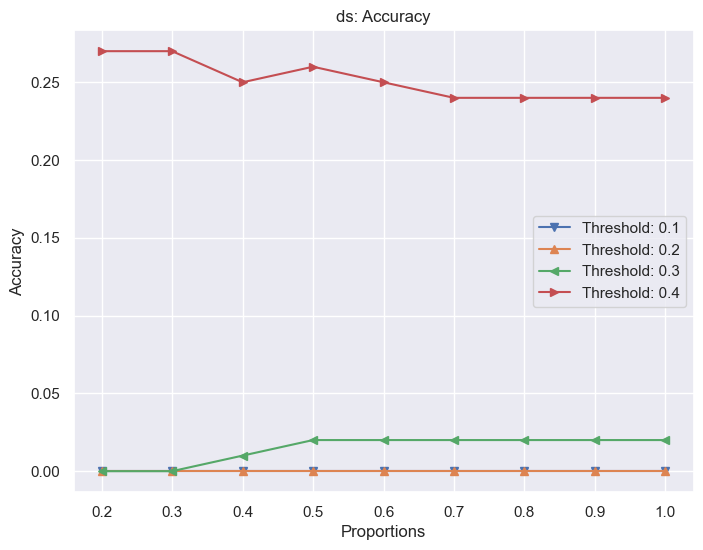

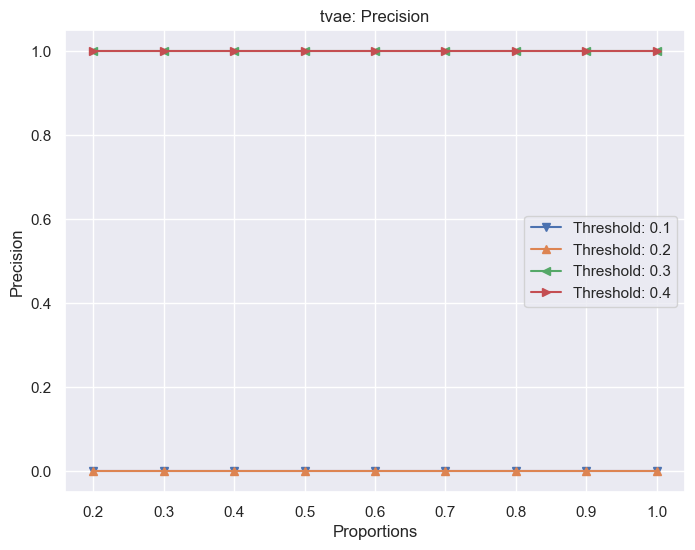

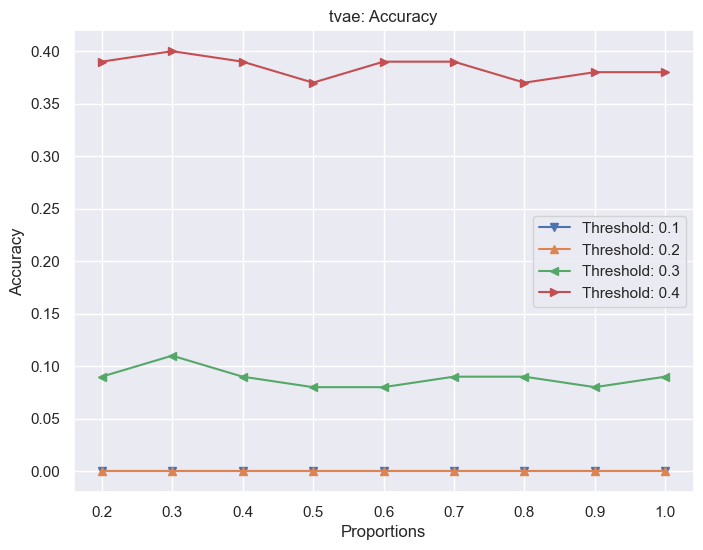

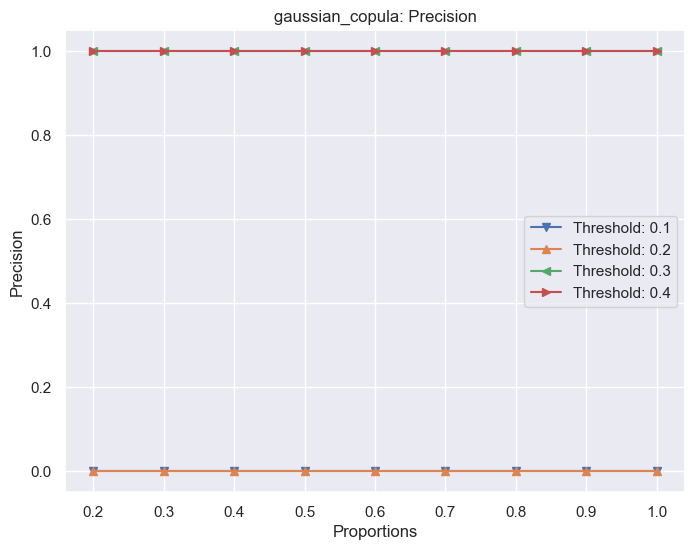

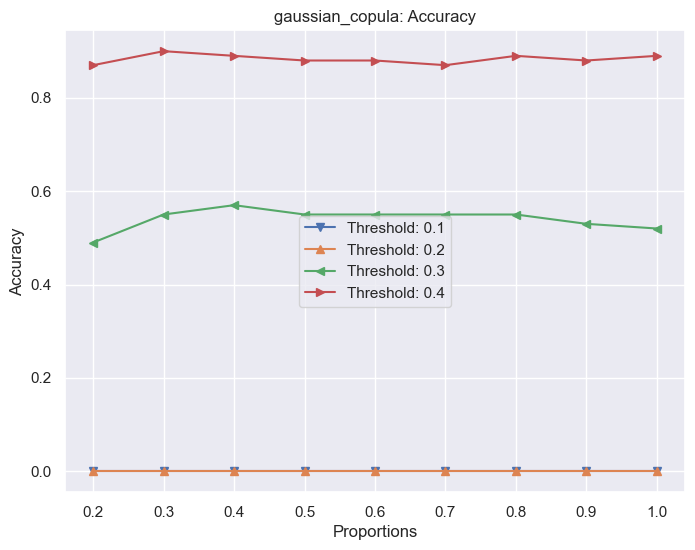

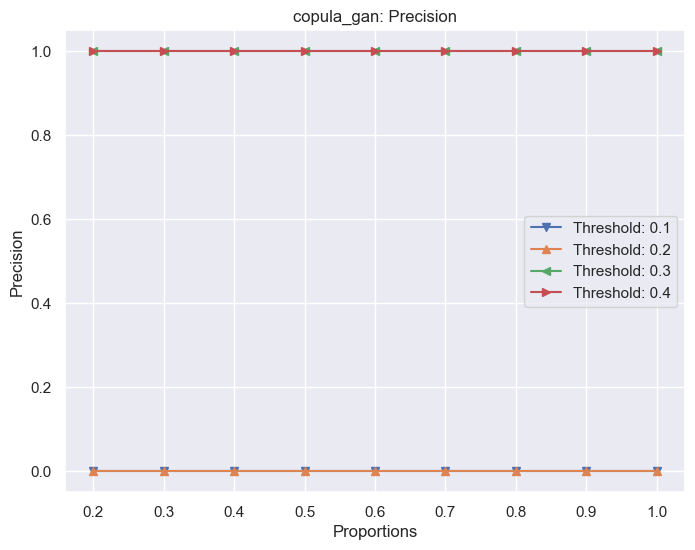

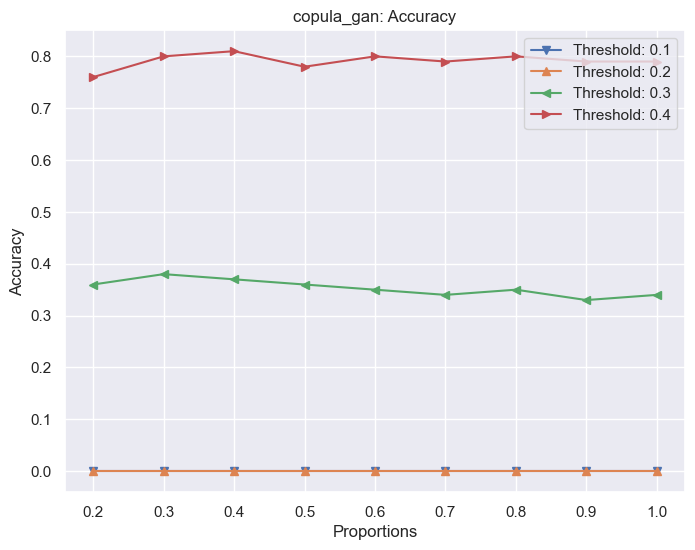

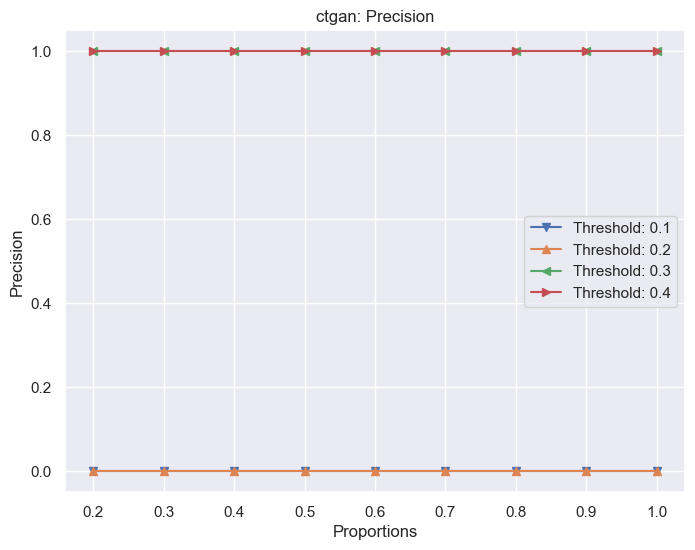

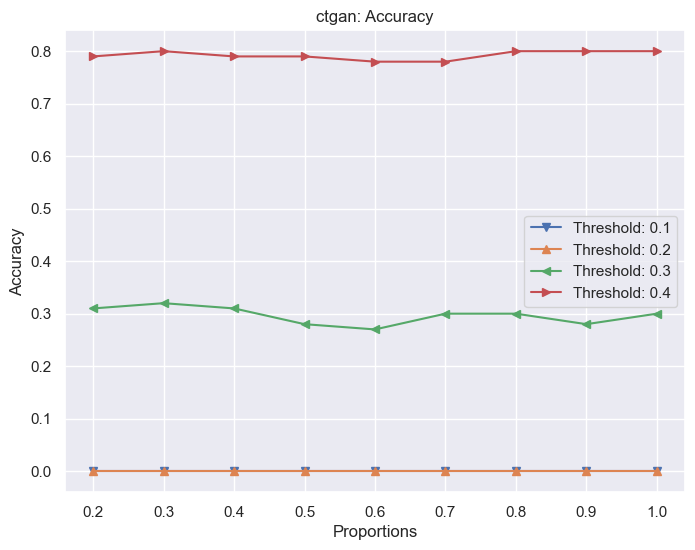

In [32]:
mia_results = {}
for i, model in enumerate(models):
    mia_results[model_names[i]] = mia(train_data, model, model_names[i], dataset_nr=1, save_plts=True)


In [33]:
row = []
proportions = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
thresholds = [0.1, 0.2, 0.3, 0.4]
for i, model in enumerate(models):
    for th in thresholds:
        for n, prop in enumerate(proportions):
            row.append([1,model_names[i], th, prop, mia_results[model_names[i]]["accuracy"][th][n], mia_results[model_names[i]]["precision"][th][n]])
mia_df = pd.DataFrame(row, columns=["Dataset", "Model", "Threshold", "Proportion", "Accuracy", "Precision"])
# mia_df.head(50)